<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
TrainPd=pd.read_excel("Concrete_Data.xls")
#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

#Verification des valeur manquantes
TrainPd.isna().sum()

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
MinMaxScaler(copy=(), feature_range=(0,1))
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)

# **SVM**

In [ ]:
#from sklearn.svm import SVR

# Définition du modèle SVM avec noyau linéaire
#svm_regressor = SVR(kernel='linear')

# Entraînement du modèle sur les données d'entraînement normalisées
#svm_regressor.fit(X_train_transformed, Y_train)





In [2]:
from sklearn.svm import SVR

# Définition du modèle SVR
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1,coef0=0,degree=3,gamma='scale')

# Entraînement du modèle sur les données d'entraînement normalisées
svm_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur l'ensemble de test
predictions = svm_regressor.predict(X_test_transoformed)


In [3]:
# Création d'un DataFrame avec les colonnes ID, Y_test et predictions
results_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions': predictions})

# Affichage des cinq premières lignes du DataFrame
print(results_df.head())


      Y_test  predictions
0  21.911547    33.030019
1  19.932751    24.364934
2  36.438807    26.528958
3  11.957582    19.781249
4  39.844818    32.050227


In [4]:
predictions_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions1': predictions})
predictions_df.head()


,Y_test,predictions1
0,21.911547,33.030019
1,19.932751,24.364934
2,36.438807,26.528958
3,11.957582,19.781249
4,39.844818,32.050227


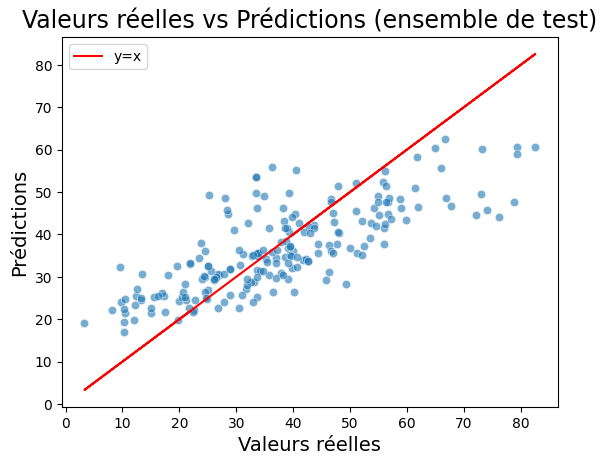

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcul du coefficient de détermination R²
r2 = r2_score(Y_test, predictions)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 8.322624798531313
Mean Squared Error (MSE): 110.6392184667345
Root Mean Squared Error (RMSE): 10.51851788355824
R-squared (R²): 0.5756010720757347


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale', 'auto'],
    #'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]  # Exemple de spécification pour gamma
    #'gamma': [0.1, 0.01, 0.001],  # Hyperparamètre gamma pour le noyau rbf
    'degree': [2, 3, 4],  # Degré pour le noyau polynomial
    'coef0': [0.0, 1.0, 2.0]  # Coefficient indépendant pour le noyau polynomial
}



# Initialisation de la recherche par grille
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Utilisation du modèle avec les meilleurs paramètres sur les données de test
best_svm = grid_search.best_estimator_
predictions_optimise = best_svm.predict(X_test_transoformed)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, predictions_optimise)
print("Mean Absolute Error (MAE) :", mae)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, predictions_optimise)
print("Mean Squared Error (MSE) :", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) :", rmse)

# Calcul du coefficient de détermination R²
r2 = r2_score(Y_test, predictions_optimise)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés :  {'C': 100, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Absolute Error (MAE) : 4.784273437714155
Mean Squared Error (MSE) : 50.6110870602297
Root Mean Squared Error (RMSE) : 7.114146966448592
R-squared (R²) : 0.8058618689908656


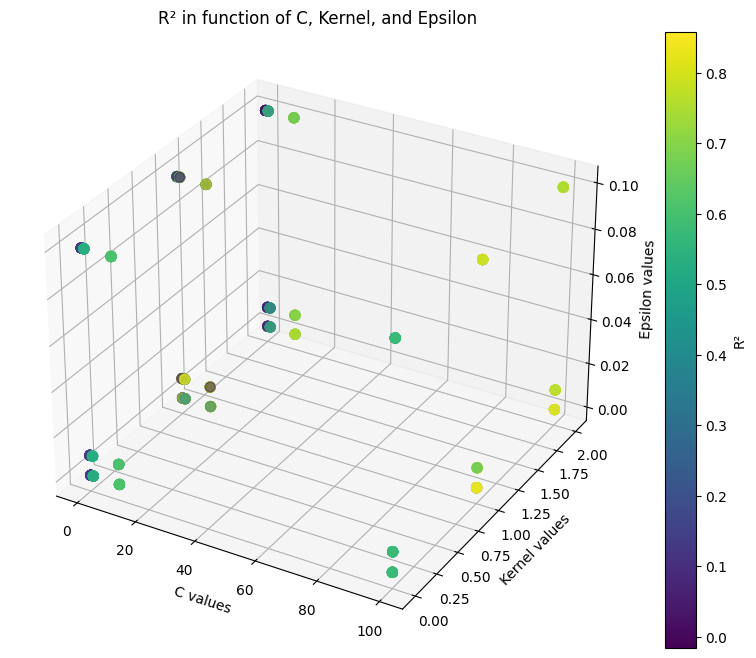

In [7]:
# Mapping des types de kernel en valeurs numériques
kernel_mapping = {'linear': 0, 'poly': 1, 'rbf': 2}

# Récupération des résultats de la GridSearchCV
results = grid_search.cv_results_

# Récupération des valeurs des hyperparamètres et des scores R²
C_values = results['param_C'].data.astype(float)
kernel_values = results['param_kernel'].data.astype(str)
epsilon_values = results['param_epsilon'].data.astype(float)
r_squared_values = results['mean_test_score']

# Conversion des types de kernel en valeurs numériques
kernel_values_numeric = np.array([kernel_mapping[k] for k in kernel_values])

# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du nuage de points en 3D avec le R² comme couleur
sc = ax.scatter(C_values, kernel_values_numeric, epsilon_values, c=r_squared_values, cmap='viridis', s=50)

# Labels des axes
ax.set_xlabel('C values')
ax.set_ylabel('Kernel values')
ax.set_zlabel('Epsilon values')
ax.set_title('R² in function of C, Kernel, and Epsilon')

# Barre de couleur pour le R²
cbar = fig.colorbar(sc)
cbar.set_label('R²')

plt.show()


In [16]:
# Création d'un DataFrame avec les colonnes ID, Y_test et predictions
results_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions': predictions,'predictions_optimise': predictions_optimise})

# Affichage des cinq premières lignes du DataFrame
print(results_df.head())

      Y_test  predictions  predictions_optimise
0  21.911547    33.030019             26.513694
1  19.932751    24.364934             14.242797
2  36.438807    26.528958             19.401611
3  11.957582    19.781249             12.106151
4  39.844818    32.050227             31.627259


In [20]:
# Création d'un DataFrame contenant les valeurs de Y_test et les prédictions
comparison_df = pd.DataFrame({'Y_test': Y_test, 'Predictions': predictions_optimise})

# Filtrage pour obtenir les valeurs entre 0 et 25
interval_0_25 = comparison_df[(comparison_df['Y_test'] >= 0) & (comparison_df['Y_test'] <= 25)]

# Filtrage pour obtenir les valeurs entre 25 et 35
interval_25_35 = comparison_df[(comparison_df['Y_test'] > 25) & (comparison_df['Y_test'] <= 35)]

# Affichage des prédictions pour chaque intervalle
print("Prédictions pour l'intervalle [0, 25]:")
print(interval_0_25)

print("\nPrédictions pour l'intervalle [25, 35]:")
print(interval_25_35)


Prédictions pour l'intervalle [0, 25]:
        Y_test  Predictions
339  21.911547    26.513694
244  19.932751    14.242797
567  11.957582    12.106151
576  21.179324    21.268531
563  21.819847    22.249309
673  15.030577    14.042615
590  10.335935    10.089861
195  24.986610    21.828395
727  17.436848    16.351831
274  17.223110    17.855943
579  22.629981    22.744037
329  23.524921    29.056755
671  20.416074    16.739125
408  20.725649    25.189948
770  14.989208    15.596621
191  22.835445    24.060738
189  10.383509    13.390080
200  21.063492    20.365845
928  24.579819    24.779497
531  23.848975    42.742473
186  24.890084    25.392460
984   9.738159    13.241045
699   9.561653    22.548167
194  12.451937    16.210354
241  24.538451    24.568066
943  12.180972    14.246002
806  24.000660    26.258132
809  19.691435    19.791092
543  10.222171    11.947395
968  13.293787    12.556249
949  17.959471    16.533664
541  15.615942    16.653336
918  10.535193    10.609362
645  19.5

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Données filtrées pour l'intervalle [25, 35]
interval_25_35 = comparison_df[(comparison_df['Y_test'] > 25) & (comparison_df['Y_test'] <= 35)]

# Séparation des valeurs réelles et des prédictions pour cet intervalle
Y_test_25_35 = interval_25_35['Y_test']
predictions_25_35 = interval_25_35['Predictions']

# Calcul des métriques d'évaluation pour cet intervalle
mae_25_35 = mean_absolute_error(Y_test_25_35, predictions_25_35)
mse_25_35 = mean_squared_error(Y_test_25_35, predictions_25_35)
rmse_25_35 = np.sqrt(mse_25_35)
r2_25_35 = r2_score(Y_test_25_35, predictions_25_35)

# Affichage des métriques pour l'intervalle [25, 35]
print("Performance du modèle pour l'intervalle [25, 35]:")
print("Mean Absolute Error (MAE) :", mae_25_35)
print("Mean Squared Error (MSE) :", mse_25_35)
print("Root Mean Squared Error (RMSE) :", rmse_25_35)
print("R-squared (R²) :", r2_25_35)


Performance du modèle pour l'intervalle [25, 35]:
Mean Absolute Error (MAE) : 5.65564384738035
Mean Squared Error (MSE) : 63.54864132444653
Root Mean Squared Error (RMSE) : 7.97174016915043
R-squared (R²) : -5.592629276429342


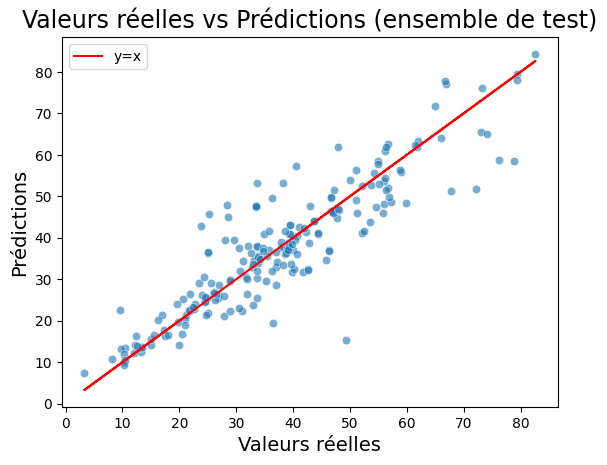

In [17]:
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_optimise, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()


In [ ]:
# Récupérer les résultats de la recherche par grille
results = grid_search.cv_results_

# Créer une DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Sélectionner les colonnes pertinentes : 'param_C', 'param_kernel', 'param_gamma', 'param_epsilon', 'mean_test_score'
columns_to_keep = ['param_C', 'param_kernel', 'param_epsilon', 'mean_test_score']
results_df = results_df[columns_to_keep]

# Affichage de la matrice des combinaisons de paramètres et leurs valeurs R²
print(results_df)



   param_C param_kernel param_epsilon  mean_test_score
0      0.1       linear           0.1         0.136246
1      0.1          rbf           0.1         0.146935
2      0.1       linear          0.01         0.136215
3      0.1          rbf          0.01         0.146500
4      0.1       linear         0.001         0.136247
5      0.1          rbf         0.001         0.146524
6        1       linear           0.1         0.532870
7        1          rbf           0.1         0.578736
8        1       linear          0.01         0.532788
9        1          rbf          0.01         0.578214
10       1       linear         0.001         0.532784
11       1          rbf         0.001         0.578170
12      10       linear           0.1         0.608332
13      10          rbf           0.1         0.786114
14      10       linear          0.01         0.607299
15      10          rbf          0.01         0.786372
16      10       linear         0.001         0.607256
17      10

In [ ]:
# Créer une table pivot avec les valeurs de C et R² pour chaque combinaison
pivot_table = results_df.pivot_table(values='mean_test_score', index=results_df.index, columns='param_C')

# Afficher le tableau
#print(pivot_table)

print(pivot_table.iloc[0:35])  # Affiche les lignes de l'indice 10 à l'indice 20 inclus
print(pivot_table.iloc[35:72])

param_C     0.1       1.0       10.0      100.0
0        0.136246       NaN       NaN       NaN
1        0.146935       NaN       NaN       NaN
2        0.136215       NaN       NaN       NaN
3        0.146500       NaN       NaN       NaN
4        0.136247       NaN       NaN       NaN
5        0.146524       NaN       NaN       NaN
6             NaN  0.532870       NaN       NaN
7             NaN  0.578736       NaN       NaN
8             NaN  0.532788       NaN       NaN
9             NaN  0.578214       NaN       NaN
10            NaN  0.532784       NaN       NaN
11            NaN  0.578170       NaN       NaN
12            NaN       NaN  0.608332       NaN
13            NaN       NaN  0.786114       NaN
14            NaN       NaN  0.607299       NaN
15            NaN       NaN  0.786372       NaN
16            NaN       NaN  0.607256       NaN
17            NaN       NaN  0.786393       NaN
18            NaN       NaN       NaN  0.577819
19            NaN       NaN       NaN  0

In [ ]:
#grid = GridSearchCV(estimator=SVR(),param_grid= param_grid, refit = True, verbose=2, cv=5 )
# May take a while!
#grid.fit(X_train,Y_train)

In [ ]:
# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Affichage de toutes les combinaisons testées et leurs scores correspondants
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score moyen : {mean_score:.4f}, Paramètres : {params}")


Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Score moyen : 0.1469, Paramètres : {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Score moyen : 0.1465, Paramètres : {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Score moyen : 0.1362, Paramètres : {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}
Score moyen : 0.1465, Paramètres : {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}
Score moyen : 0.5329, Paramètres : {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Score moyen : 0.5787, Paramètres : {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score moyen : 0.5328, Paramètres : {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Score moyen : 0.5782, Paramètres : {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Score moyen : 0.5328, Paramètres : {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}
Score moyen : 0.5782, Paramètres : {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}
Score moyen : 0.6083, Paramètres :

In [ ]:
import pandas as pd

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Création d'un DataFrame Pandas à partir des résultats de la recherche par grille
results = pd.DataFrame(grid_search.cv_results_)

# Affichage des résultats sous forme de tableau
print(results[['params', 'mean_test_score']])


                                              params  mean_test_score
0     {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}         0.136246
1        {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}         0.146935
2    {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}         0.136215
3       {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.146500
4   {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}         0.136247
5      {'C': 0.1, 'epsilon': 0.001, 'kernel': 'rbf'}         0.146524
6       {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}         0.532870
7          {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}         0.578736
8      {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}         0.532788
9         {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}         0.578214
10    {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}         0.532784
11       {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}         0.578170
12     {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}         0.608332
13        {'C': 10, 

# **XGBoost**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


# Réglage des hyperparamètres pour XGBoost
xgb_regressor = xgb.XGBRegressor()

# Paramètres à régler
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5)
grid_search.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train_transformed, Y_train)
predictions_xgb = best_xgb.predict(X_test_transoformed)

# Évaluation du modèle
mae = mean_absolute_error(Y_test, predictions_xgb)
mse = mean_squared_error(Y_test, predictions_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions_xgb)

print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error (MAE) : 3.286273375987067
Mean Squared Error (MSE) : 22.316317603715795
Root Mean Squared Error (RMSE) : 4.724014987668413
R-squared (R²) : 0.9143972508348654


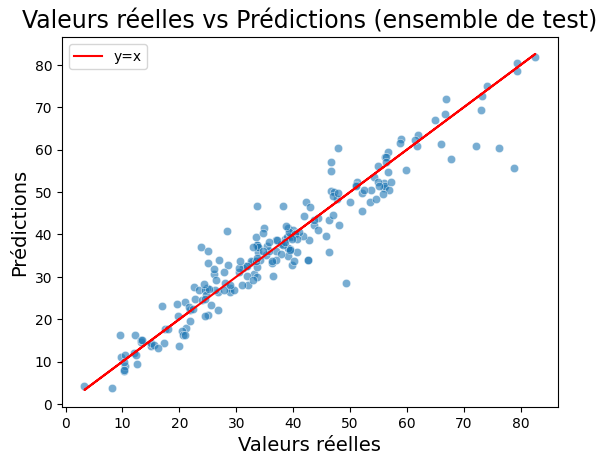

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_xgb, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()

# **ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Création du modèle AdaBoostRegressor
ada_boost_regressor = AdaBoostRegressor()

# Paramètres à régler
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
grid_search_ada = GridSearchCV(ada_boost_regressor, param_grid, cv=5)
grid_search_ada.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params_ada = grid_search_ada.best_params_
print("Meilleurs hyperparamètres trouvés - AdaBoost :", best_params_ada)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_ada_boost = AdaBoostRegressor(**best_params_ada)
best_ada_boost.fit(X_train_transformed, Y_train)
predictions_ada_boost = best_ada_boost.predict(X_test_transoformed)

# Évaluation du modèle AdaBoost
mae_ada = mean_absolute_error(Y_test, predictions_ada_boost)
mse_ada = mean_squared_error(Y_test, predictions_ada_boost)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(Y_test, predictions_ada_boost)

print("Mean Absolute Error (MAE) - AdaBoost:", mae_ada)
print("Mean Squared Error (MSE) - AdaBoost:", mse_ada)
print("Root Mean Squared Error (RMSE) - AdaBoost:", rmse_ada)
print("R-squared (R²) - AdaBoost:", r2_ada)

Meilleurs hyperparamètres trouvés - AdaBoost : {'learning_rate': 0.1, 'n_estimators': 300}
Mean Absolute Error (MAE) - AdaBoost: 6.699784834138158
Mean Squared Error (MSE) - AdaBoost: 67.38700879321745
Root Mean Squared Error (RMSE) - AdaBoost: 8.208959056617195
R-squared (R²) - AdaBoost: 0.7415114216803396


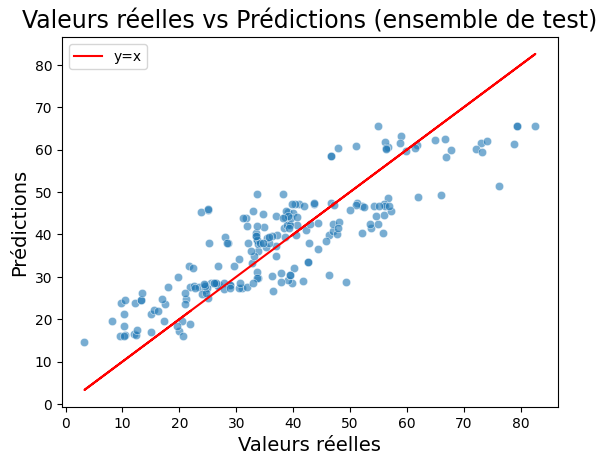

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_ada_boost, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()

# **GB**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Création du modèle GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor()

# Paramètres à régler
'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
param_grid = {
    'n_estimators': [100, 00, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
grid_search_gb = GridSearchCV(gradient_boosting_regressor, param_grid, cv=5)
grid_search_gb.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params_gb = grid_search_gb.best_params_
print("Meilleurs hyperparamètres trouvés - Gradient Boosting :", best_params_gb)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_gb = GradientBoostingRegressor(**best_params_gb)
best_gb.fit(X_train_transformed, Y_train)
predictions_gb = best_gb.predict(X_test_transoformed)

# Évaluation du modèle Gradient Boosting
mae_gb = mean_absolute_error(Y_test, predictions_gb)
mse_gb = mean_squared_error(Y_test, predictions_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(Y_test, predictions_gb)

print("Mean Absolute Error (MAE) - Gradient Boosting:", mae_gb)
print("Mean Squared Error (MSE) - Gradient Boosting:", mse_gb)
print("Root Mean Squared Error (RMSE) - Gradient Boosting:", rmse_gb)
print("R-squared (R²) - Gradient Boosting:", r2_gb)

Meilleurs hyperparamètres trouvés - Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Mean Absolute Error (MAE) - Gradient Boosting: 3.0559826491081883
Mean Squared Error (MSE) - Gradient Boosting: 22.141207504210488
Root Mean Squared Error (RMSE) - Gradient Boosting: 4.705444453418878
R-squared (R²) - Gradient Boosting: 0.9150689524206925


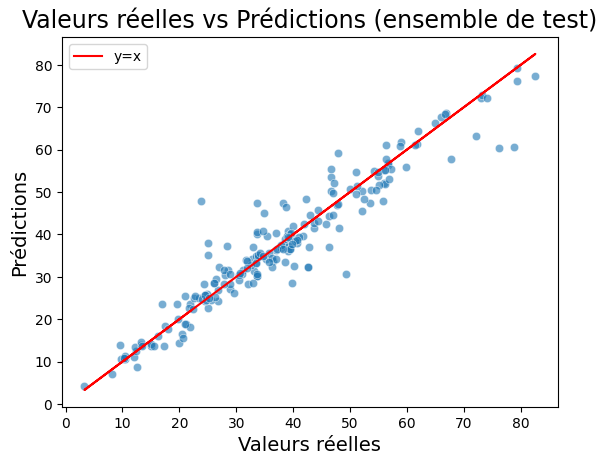

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions_gb, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()